In [224]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

import torch
from torch import nn, optim, Tensor
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable as V
from torch.nn import functional as F

the number of data point(original signal): 44100


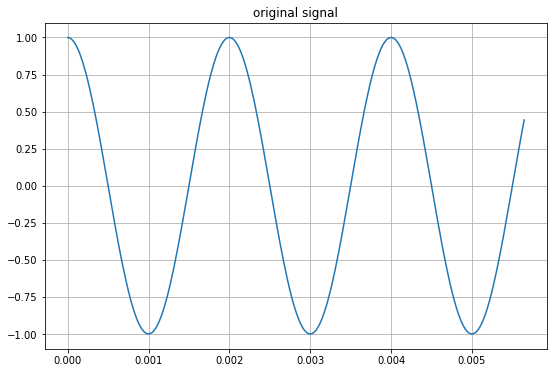

In [233]:
# 学習に使う人工データの生成
sampling_rate = 44100.0 # サンプリング周波数 [Hz]
len_seconds = 1.0 # 時間長さ[s]
f_original = 500 # 原信号の周波数
t = np.arange(sampling_rate * len_seconds) / sampling_rate # サンプリング点の時間[s]
original_signal = np.cos(2 * np.pi *  f_original * t) # cosで原信号の生成
print('the number of data point(original signal):', len(original_signal))

# 原信号の描画
%matplotlib inline
plt.figure(figsize = (9, 6))
plt.plot(t[:250], original_signal[:250])
plt.title('original signal')
plt.grid()
plt.show()

# 原信号の再生
IPython.display.Audio(original_signal, rate=44100)

In [234]:
# ①FM変調
# f_carrierは搬送波の周波数[Hz]、MFDは最大周波数偏移[Hz]
# 参考文献 : http://yyatsuo.com/?p=1635
def freq_mod(original_signal, f_original, f_carrier, MFD):
    vm = np.sin(2*np.pi*f_carrier*t + (MFD/f_original)*np.sin(2*np.pi*f_original*t))
    return vm

the number of data point(frequency modulation signal): 44100


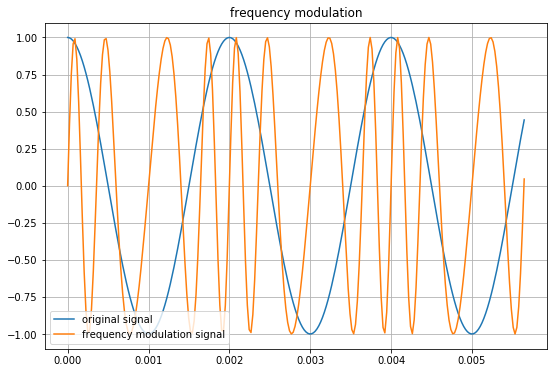

In [236]:
# 搬送波の周波数2000 [Hz], 最大周波数偏移 1000 [Hz] (一般的でない値？)
fm_signal = freq_mod(original_signal, f_original, 2000, 1000)
print('the number of data point(frequency modulation signal):', len(fm_signal))
plt.figure(figsize = (9, 6))
plt.plot(t[:250], original_signal[:250], label = 'original signal')
plt.plot(t[:250], fm_signal[:250], label = 'frequency modulation signal')
plt.legend(loc = 'lower left')
plt.title('frequency modulation')
plt.grid()
plt.show()

#FM変調信号の再生
IPython.display.Audio(fm_signal, rate=44100)

In [231]:
# ②AM変調
# f_carrierは搬送波の周波数 [Hz]
def amp_mod(original_signal, f_original, f_carrier):
    vm = np.cos(2*np.pi*f_carrier*t) + (1/2) * (np.cos(2*np.pi*(f_carrier-f_original)*t)+np.cos(2*np.pi*(f_carrier-f_original)*t))
    return vm

the number of data point(amplitude modulation signal): 44100


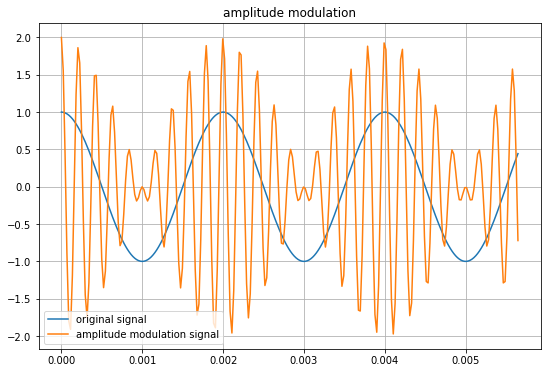

In [237]:
# 搬送波の周波数5000 [Hz] （一般的でない値？）
am_signal = amp_mod(original_signal, f_original, 5000)
print('the number of data point(amplitude modulation signal):', len(am_signal))
plt.figure(figsize = (9, 6))
plt.plot(t[:250], original_signal[:250], label = 'original signal')
plt.plot(t[:250], am_signal[:250], label = 'amplitude modulation signal')
plt.legend(loc = 'lower left')
plt.title('amplitude modulation')
plt.grid()
plt.show()

# AM変調信号の再生
IPython.display.Audio(am_signal, rate=44100)

In [183]:
# μ-law
def mu_law_encoding(signal, mu = 255):
    signal = signal / np.max(np.abs(signal))
    signal_encoded = np.sign(signal) * np.log(1 + mu*np.abs(signal)) / np.log(1 + mu)
    return signal_encoded

In [184]:
mu_law_encoding(original_signal)

array([1.        , 0.99991134, 0.99964519, ..., 0.99920102, 0.99964519,
       0.99991134])

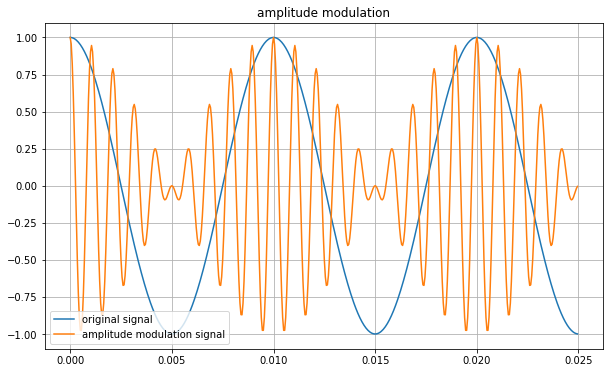

In [174]:
am_signal2 = am_signal / np.max(am_signal)
plt.figure(figsize = (10, 6))
plt.plot(t[:500], original_signal[:500], label = 'original signal')
plt.plot(t[:500], am_signal2[:500], label = 'amplitude modulation signal')
plt.legend(loc = 'lower left')
plt.title('amplitude modulation')
plt.grid()
plt.show()